<a href="https://colab.research.google.com/github/LuizTj/Backend-CRUD-Alunos/blob/main/02b_Otimizacao_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ATIVIDADE FEITA # Algoritmos de Otimização para Redes Neurais Artificiais

Os algoritmos de otimização são fundamentais para o processo de aprendizagem de redes neurais, pois determinam como os pesos dos neurônios são ajustados para minimizar a função de perda durante o treinamento.
O objetivo da otimização é encontrar os melhores parâmetros (pesos e vieses) que permitam à rede fazer previsões precisas em novos dados.

A função de perda mede o quão longe as previsões do modelo estão dos valores reais, e o papel do algoritmo de otimização é minimizar essa função ajustando gradualmente os pesos.
Isso é feito por meio do cálculo do gradiente, pelo algoritmo de _backpropagation_, que indica a direção e a magnitude da mudança necessária nos pesos.

Agora, vamos explorar alguns dos principais algoritmos relacionados à otimização de redes neurais artificiais.

## Backpropagation

A criação do algoritmo de bakpropagation em 1986 foi um marco decisivo na área de inteligência artificial. Antes disso, havia muita dificuldade em treinar redes neurais com mais camadas para resolver problemas não-lineares.
O algoritmo de _backpropagaation_ consegue, a partir da regra da cadeia, propagar os gradientes relacionados aos erros de classificação de uma camada a outra, o que permite o treino de modelos com múltiplas camadas utilizando algoritmos de otimização por gradiente descendente.

O algoritmo funciona da seguinte forma:

1. O modelo recebe as entradas $x$ e faz a propagação direta (forward pass), gerando saídas $\hat{y}$
2. Uma função de perda é utilizada para calcular o erro $e$ em função da saída $\hat{y}$ e da saída esperada $y$.
3. O gradiente do erro é propagado para as camadas anteriores utilizando a regra da cadeia

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/backprop.jpg?raw=true" width="500"></center>

A partir dos gradientes calculados para cada parâmetro, o algoritmo de otimização gradiente descendente consegue ajustar os pesos para minimizar o erro do modelo.

### Regra da Cadeia

A regra da cadeia é o princípio matemático que permite a propagação das derivadas no algoritmo de _backpropagation_.
A partir desta regra, é possível calcular o gradiente do erro $E$ em função da variação de cada parâmetro da rede $\delta w_n$ na forma $\frac{\delta E}{\delta w_n}$.

Vejamos como exemplo uma rede simples abaixo, onde temos o erro entre a saída do modelo $\hat{y}$ e a saída esperada $y$, uma função de ativação $f(\cdot)$, um valor intermediário $z$, um peso $w$, um viés $b$ e uma entrada $x$.

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/simple_backprop.jpg?raw=true" width="500"></center>

Nosso objetivo é calcular $\frac{\delta E}{\delta w_n}$. Para isto, podemos utilizar a regra da cadeia, onde temos um produto de gradientes de cada etapa entre $w$ e $E$.
Esta regra pode ser aplicada para encontrar o gradiente do erro em função de demais parâmetros que poderiam vir antes de $x$.

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/chain_rule.jpg?raw=true" width="400"></center>

Temos também outra propriedade, quando um parâmetro recebe o gradiente de diversos caminhos diferentes.

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/multiple_gradients.jpg?raw=true" width="500"></center>

Nestes casos, podemos apenas somar os gradientes.

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/multiple_gradients_math.jpg?raw=true" width="400"></center>

## Gradiente Descendente

O gradiente descendente é o algoritmo de otimização mais simples e amplamente utilizado.
Ele funciona ajustando os pesos na direção oposta ao gradiente da função de perda com relação a esses pesos.
A ideia é que, ao seguir essa direção de forma iterativa, o algoritmo chegue ao mínimo da função de perda, onde o modelo realiza as previsões mais precisas.
Sua idéia original foi proposta por Augustin Cauchy (1847).

Existem três variações principais do gradiente descendente:

- Batch Gradient Descent: Calcula o gradiente em todo o conjunto de dados de treinamento antes de atualizar os pesos. Esse método pode ser lento e ineficiente para grandes conjuntos de dados.
- Stochastic Gradient Descent (SGD): Atualiza os pesos para cada exemplo de treino individual, tornando o processo mais rápido, mas introduzindo maior variação nas atualizações. Teve suas origens baseadas nos estudos de Robbins e Monro (1951).
- Mini-Batch Gradient Descent: Combina os dois anteriores, calculando o gradiente em pequenos lotes de dados, acelerando o treinamento e suavizando a variação das atualizações.

Para utilizar este algoritmo em pytorch, instanciamos um objeto de otimização conforme a célula abaixo.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## Principais Avanços em Algoritmos de Otimização

A partir do algoritmo do gradiente descendente, foram propostos novos algoritmos que aceleram a convergência durante o treinamento de redes neurais. Esta seção apresenta alguns deles.

### Momentum

O Momentum foi introduzido como uma melhoria ao gradiente descendente por Polyak em 1964.
Recentemente, sua aplicação foi fundamental para acelerar o desenvolvimento de redes neurais artificiais (Sutskever et al., 2013).
Ele acelera o processo de convergência em direção ao mínimo, acumulando uma fração do gradiente anterior em cada atualização.
Isso ajuda a suavizar o caminho em direção ao mínimo, evitando oscilações, especialmente em direções que têm gradientes mais ruidosos.

A ideia é que, em vez de seguir estritamente a direção do gradiente atual, o modelo leva em conta o "momento" da direção em que está se movendo, como uma bola rolando por uma superfície irregular.
Isso permite que o modelo alcance o mínimo mais rapidamente.

Utilizamos este otimizador em Pytorch conforme acélula abaixo.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.1)

### RMSProp

O RMSProp é um método de otimização adaptativo proposto por Hinton et al. (2012) que ajusta a taxa de aprendizado individualmente para cada parâmetro, com base na magnitude dos gradientes recentes.
Ele mantém uma média móvel quadrada dos gradientes ao longo do tempo e, ao dividir o gradiente atual por essa média, corrige a taxa de aprendizado para cada parâmetro.
Isso faz com que RMSProp se adapte melhor a problemas com gradientes que variam em escalas diferentes.

Essa adaptação da taxa de aprendizado para cada peso torna o treinamento mais estável e eficaz, especialmente em problemas como redes neurais profundas, onde as atualizações dos pesos podem variar muito.

Utilizamos este otimizador em Pytorch conforme acélula abaixo.

In [ ]:
optimizer = torch.optim.RMSProp(model.parameters(), lr=0.01, alpha=0.99)

### ADAM

O ADAM (Kingma e Ba, 2014) combina o melhor de dois mundos: as ideias do Momentum e do RMSProp.
Ele calcula uma média móvel dos gradientes (como o Momentum) e uma média móvel dos quadrados dos gradientes (como o RMSProp), ajustando a taxa de aprendizado de forma adaptativa para cada parâmetro.

ADAM também inclui uma correção para viés nos primeiros passos, garantindo que as médias móveis comecem corretamente ajustadas.
Esse algoritmo é um dos mais populares atualmente, pois oferece uma convergência mais rápida e estável em diversos tipos de problemas de redes neurais, sendo menos sensível à escolha da taxa de aprendizado inicial.

Utilizamos este otimizador em Pytorch conforme acélula abaixo.

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Outros Algoritmos de Otimização

Além dos algoritmos clássicos que discutimos (Gradiente Descendente, Momentum, RMSProp e ADAM), existem outros algoritmos de otimização relevantes que, dependendo do problema e das características da rede neural, podem oferecer vantagens em termos de desempenho ou convergência.

O **AdaGrad** é um dos primeiros algoritmos de otimização adaptativos, introduzido antes do RMSProp.
Ele ajusta a taxa de aprendizado para cada parâmetro de forma individual, com base nas atualizações anteriores.
Isso significa que parâmetros raramente atualizados têm uma taxa de aprendizado maior, enquanto aqueles que já foram ajustados várias vezes têm a taxa de aprendizado reduzida.
Embora seja útil em problemas esparsos, como no processamento de linguagem natural, onde algumas features são raras, AdaGrad pode sofrer de um decaimento excessivo da taxa de aprendizado, o que leva a convergência mais lenta em muitos casos.

O **AdaDelta** é uma variação do AdaGrad, projetada para corrigir o problema de decaimento da taxa de aprendizado.
Em vez de acumular todas as atualizações anteriores, como o AdaGrad, o AdaDelta mantém uma janela deslizante de atualizações recentes, limitando o impacto de atualizações passadas muito distantes.
Isso mantém a adaptabilidade da taxa de aprendizado sem que ela diminua drasticamente ao longo do tempo.
Assim como o RMSProp, AdaDelta é muito utilizado em redes profundas e outros problemas complexos.

O **Nadam** é uma combinação de ADAM com o conceito de Nesterov Momentum.
A diferença em relação ao Momentum clássico é que, no Nesterov Momentum, o cálculo do gradiente é realizado com uma "visão antecipada" da direção para onde os pesos estão se movendo, o que pode acelerar o processo de convergência.
O Nadam aplica essa ideia no contexto do ADAM, resultando em um algoritmo que pode ser ligeiramente mais eficiente e estável do que o ADAM em certos cenários.

O **AMSGrad** é uma modificação do ADAM que tenta resolver um problema de convergência observada no ADAM original, especialmente em situações onde a função de perda não é convexa.
No ADAM, os parâmetros de aprendizado podem não convergir para o ótimo global em algumas situações.
O AMSGrad corrige isso, garantindo que as médias móveis dos gradientes só decaiam, o que melhora a convergência em alguns problemas.

# Exercícios

1. Testar três diferentes learning rates e dois algoritmos de otimização no problema do capítulo anterior. O que é possível verificar de diferente?

REsposta: Ao variar o learning rate e o algoritmo de otimização, observa-se que valores baixos de learning rate resultam em convergência lenta, enquanto valores elevados podem causar instabilidade no treinamento. O otimizador Adam apresentou convergência mais rápida e estável em comparação ao SGD, especialmente para learning rates maiores. O melhor desempenho foi obtido com learning rate intermediário, equilibrando velocidade de convergência e erro final.

ADAM apresentou melhores resultados de aprendizagem, além de resultados maior pcisão. os resultados de teste se saiu pior que os de treinamento.

ADAM  learning rate 0,01

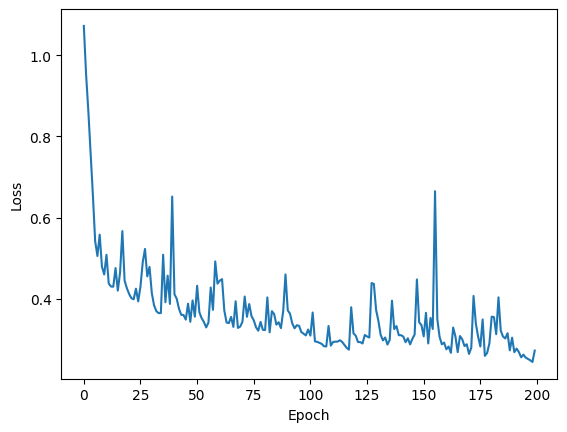

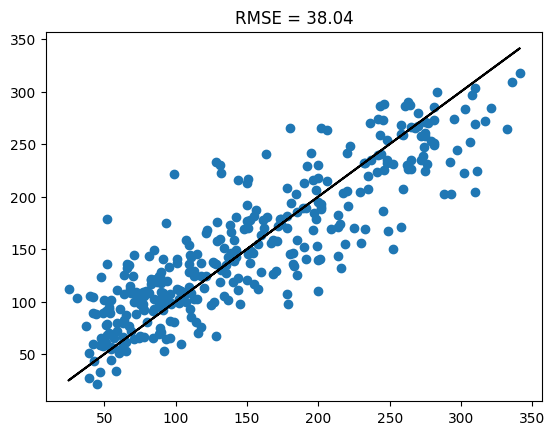

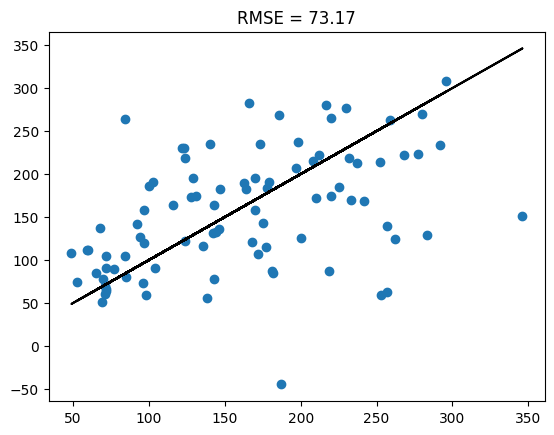

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris, load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_mean = X_train.mean(axis=0)
y_mean = y_train.mean(axis=0)

x_std = X_train.std(axis=0)
y_std = y_train.std(axis=0)

X_train = (X_train - x_mean)/x_std
y_train = (y_train - y_mean)/y_std

X_test = (X_test - x_mean)/x_std
y_test = (y_test - y_mean)/y_std

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.hidden_layer1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden_layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.nn.functional.relu(self.hidden_layer1(x))
        x = torch.nn.functional.relu(self.hidden_layer2(x))
        return self.output_layer(x)

model = MLP(10, 10)

optimizer_name = 'Adam'   # 'SGD' ou 'Adam'
learning_rate = 0.01    #  0.0001, 0.001 ou 0.01

if optimizer_name == 'SGD':
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
elif optimizer_name == 'Adam':
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


criterion = torch.nn.MSELoss()

num_epochs = 200
loss_logs = []

for epoch in range(num_epochs):

    # Start epoch loss
    running_loss = 0.0

    for b, (X_batch, y_batch) in enumerate(train_dataloader):

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    # Update epoch loss
    loss_logs.append(running_loss/b)

# Plot loss
plt.plot(loss_logs)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

with torch.no_grad():
    outputs = model(X_train)
    y_train_real = y_train * y_std + y_mean
    outputs_real = outputs * y_std + y_mean

plt.scatter(y_train_real, outputs_real)
plt.plot(y_train_real, y_train_real, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs_real, y_train_real).item()):.2f}')
plt.show()

with torch.no_grad():
    outputs = model(X_test)
    y_test_real = y_test * y_std + y_mean
    outputs_real = outputs * y_std + y_mean

plt.scatter(y_test_real, outputs_real)
plt.plot(y_test_real, y_test_real, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs_real, y_test_real).item()):.2f}')
plt.show()

ADAM  learning rate 0,001

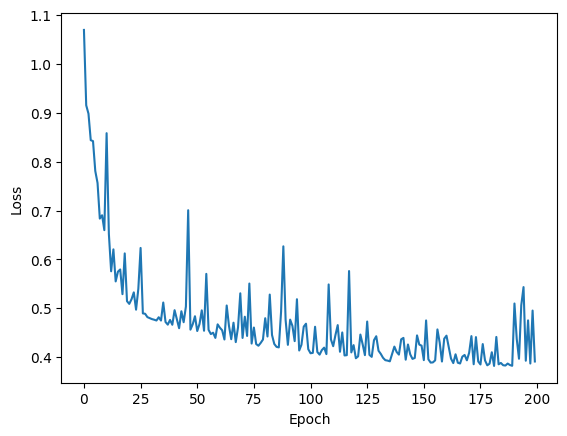

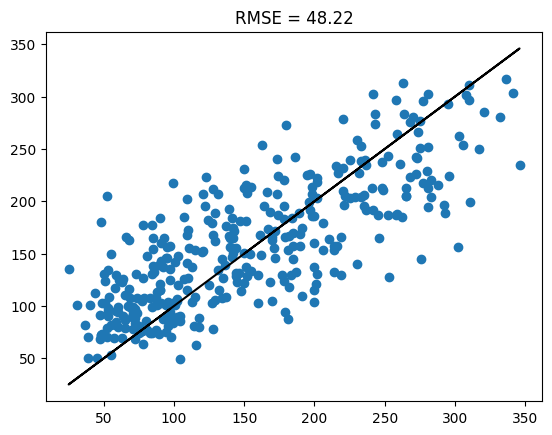

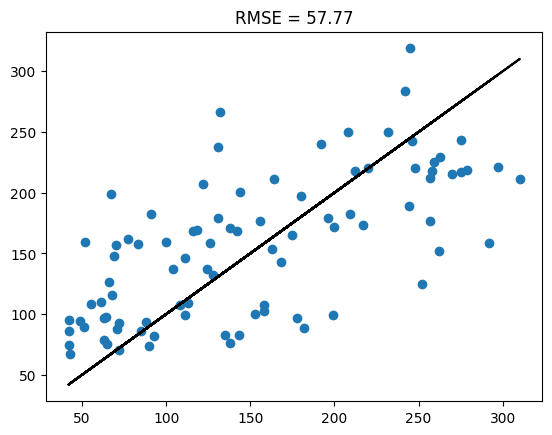

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris, load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_mean = X_train.mean(axis=0)
y_mean = y_train.mean(axis=0)

x_std = X_train.std(axis=0)
y_std = y_train.std(axis=0)

X_train = (X_train - x_mean)/x_std
y_train = (y_train - y_mean)/y_std

X_test = (X_test - x_mean)/x_std
y_test = (y_test - y_mean)/y_std

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.hidden_layer1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden_layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.nn.functional.relu(self.hidden_layer1(x))
        x = torch.nn.functional.relu(self.hidden_layer2(x))
        return self.output_layer(x)

model = MLP(10, 10)

optimizer_name = 'Adam'   # 'SGD' ou 'Adam'
learning_rate = 0.001    #  0.0001, 0.001 ou 0.01

if optimizer_name == 'SGD':
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
elif optimizer_name == 'Adam':
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


criterion = torch.nn.MSELoss()

num_epochs = 200
loss_logs = []

for epoch in range(num_epochs):

    # Start epoch loss
    running_loss = 0.0

    for b, (X_batch, y_batch) in enumerate(train_dataloader):

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    # Update epoch loss
    loss_logs.append(running_loss/b)

# Plot loss
plt.plot(loss_logs)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

with torch.no_grad():
    outputs = model(X_train)
    y_train_real = y_train * y_std + y_mean
    outputs_real = outputs * y_std + y_mean

plt.scatter(y_train_real, outputs_real)
plt.plot(y_train_real, y_train_real, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs_real, y_train_real).item()):.2f}')
plt.show()

with torch.no_grad():
    outputs = model(X_test)
    y_test_real = y_test * y_std + y_mean
    outputs_real = outputs * y_std + y_mean

plt.scatter(y_test_real, outputs_real)
plt.plot(y_test_real, y_test_real, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs_real, y_test_real).item()):.2f}')
plt.show()

ADAM  learning rate 0,0001

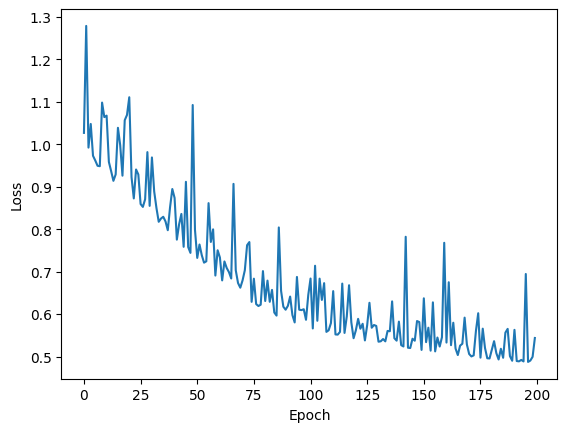

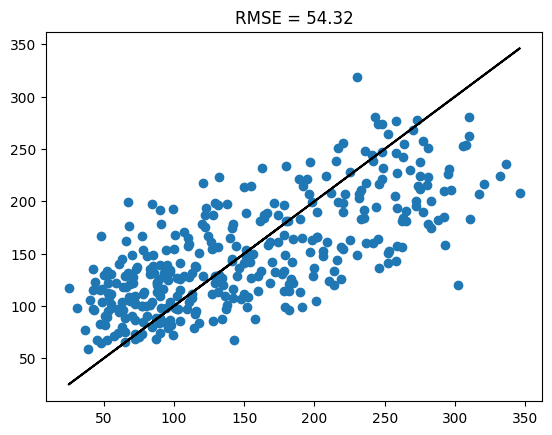

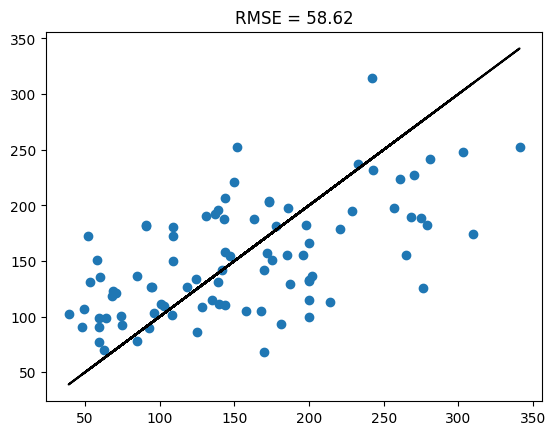

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris, load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_mean = X_train.mean(axis=0)
y_mean = y_train.mean(axis=0)

x_std = X_train.std(axis=0)
y_std = y_train.std(axis=0)

X_train = (X_train - x_mean)/x_std
y_train = (y_train - y_mean)/y_std

X_test = (X_test - x_mean)/x_std
y_test = (y_test - y_mean)/y_std

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.hidden_layer1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden_layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.nn.functional.relu(self.hidden_layer1(x))
        x = torch.nn.functional.relu(self.hidden_layer2(x))
        return self.output_layer(x)

model = MLP(10, 10)

optimizer_name = 'Adam'   # 'SGD' ou 'Adam'
learning_rate = 0.0001    #  0.0001, 0.001 ou 0.01

if optimizer_name == 'SGD':
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
elif optimizer_name == 'Adam':
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


criterion = torch.nn.MSELoss()

num_epochs = 200
loss_logs = []

for epoch in range(num_epochs):

    # Start epoch loss
    running_loss = 0.0

    for b, (X_batch, y_batch) in enumerate(train_dataloader):

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    # Update epoch loss
    loss_logs.append(running_loss/b)

# Plot loss
plt.plot(loss_logs)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

with torch.no_grad():
    outputs = model(X_train)
    y_train_real = y_train * y_std + y_mean
    outputs_real = outputs * y_std + y_mean

plt.scatter(y_train_real, outputs_real)
plt.plot(y_train_real, y_train_real, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs_real, y_train_real).item()):.2f}')
plt.show()

with torch.no_grad():
    outputs = model(X_test)
    y_test_real = y_test * y_std + y_mean
    outputs_real = outputs * y_std + y_mean

plt.scatter(y_test_real, outputs_real)
plt.plot(y_test_real, y_test_real, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs_real, y_test_real).item()):.2f}')
plt.show()

SGD  learning rate 0,01

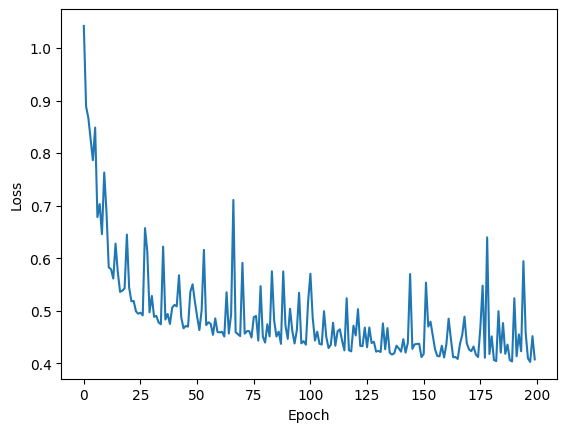

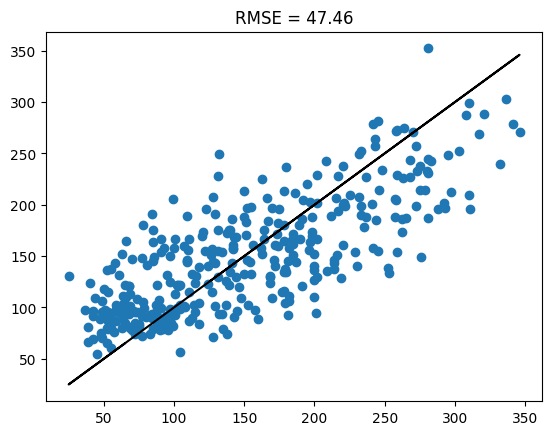

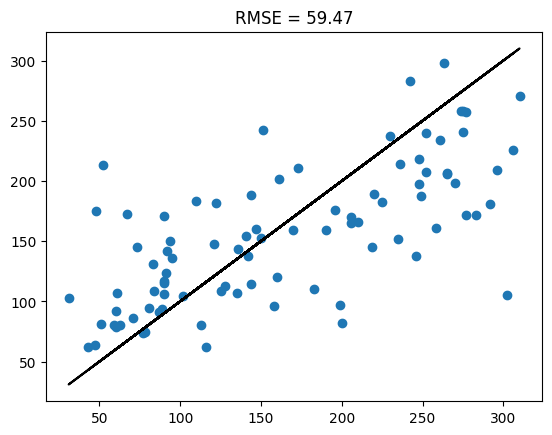

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris, load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_mean = X_train.mean(axis=0)
y_mean = y_train.mean(axis=0)

x_std = X_train.std(axis=0)
y_std = y_train.std(axis=0)

X_train = (X_train - x_mean)/x_std
y_train = (y_train - y_mean)/y_std

X_test = (X_test - x_mean)/x_std
y_test = (y_test - y_mean)/y_std

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.hidden_layer1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden_layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.nn.functional.relu(self.hidden_layer1(x))
        x = torch.nn.functional.relu(self.hidden_layer2(x))
        return self.output_layer(x)

model = MLP(10, 10)

optimizer_name = 'SGD'   # 'SGD' ou 'Adam'
learning_rate = 0.01    #  0.0001, 0.001 ou 0.01

if optimizer_name == 'SGD':
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
elif optimizer_name == 'Adam':
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


criterion = torch.nn.MSELoss()

num_epochs = 200
loss_logs = []

for epoch in range(num_epochs):

    # Start epoch loss
    running_loss = 0.0

    for b, (X_batch, y_batch) in enumerate(train_dataloader):

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    # Update epoch loss
    loss_logs.append(running_loss/b)

# Plot loss
plt.plot(loss_logs)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

with torch.no_grad():
    outputs = model(X_train)
    y_train_real = y_train * y_std + y_mean
    outputs_real = outputs * y_std + y_mean

plt.scatter(y_train_real, outputs_real)
plt.plot(y_train_real, y_train_real, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs_real, y_train_real).item()):.2f}')
plt.show()

with torch.no_grad():
    outputs = model(X_test)
    y_test_real = y_test * y_std + y_mean
    outputs_real = outputs * y_std + y_mean

plt.scatter(y_test_real, outputs_real)
plt.plot(y_test_real, y_test_real, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs_real, y_test_real).item()):.2f}')
plt.show()

SGD learning rate 0,001

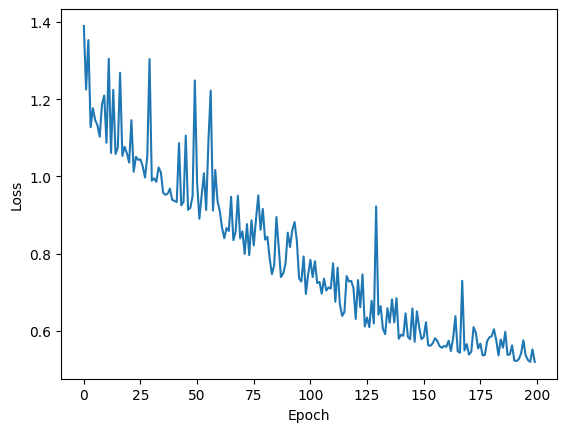

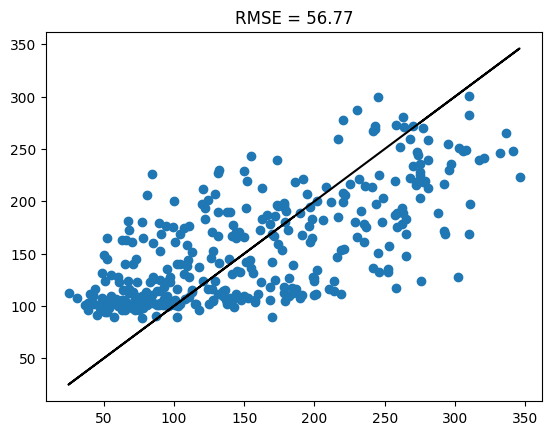

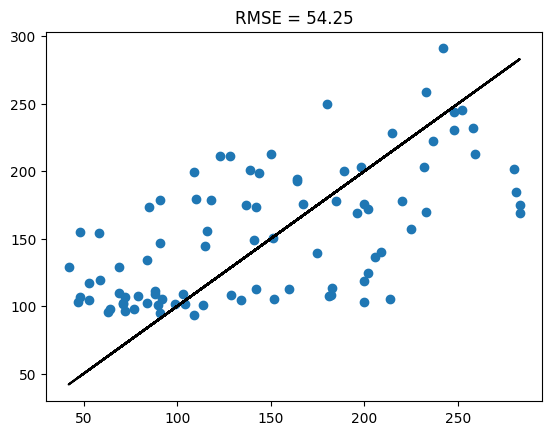

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris, load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_mean = X_train.mean(axis=0)
y_mean = y_train.mean(axis=0)

x_std = X_train.std(axis=0)
y_std = y_train.std(axis=0)

X_train = (X_train - x_mean)/x_std
y_train = (y_train - y_mean)/y_std

X_test = (X_test - x_mean)/x_std
y_test = (y_test - y_mean)/y_std

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.hidden_layer1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden_layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.nn.functional.relu(self.hidden_layer1(x))
        x = torch.nn.functional.relu(self.hidden_layer2(x))
        return self.output_layer(x)

model = MLP(10, 10)

optimizer_name = 'SGD'   # 'SGD' ou 'Adam'
learning_rate = 0.001    #  0.0001, 0.001 ou 0.01

if optimizer_name == 'SGD':
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
elif optimizer_name == 'Adam':
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


criterion = torch.nn.MSELoss()

num_epochs = 200
loss_logs = []

for epoch in range(num_epochs):

    # Start epoch loss
    running_loss = 0.0

    for b, (X_batch, y_batch) in enumerate(train_dataloader):

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    # Update epoch loss
    loss_logs.append(running_loss/b)

# Plot loss
plt.plot(loss_logs)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

with torch.no_grad():
    outputs = model(X_train)
    y_train_real = y_train * y_std + y_mean
    outputs_real = outputs * y_std + y_mean

plt.scatter(y_train_real, outputs_real)
plt.plot(y_train_real, y_train_real, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs_real, y_train_real).item()):.2f}')
plt.show()

with torch.no_grad():
    outputs = model(X_test)
    y_test_real = y_test * y_std + y_mean
    outputs_real = outputs * y_std + y_mean

plt.scatter(y_test_real, outputs_real)
plt.plot(y_test_real, y_test_real, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs_real, y_test_real).item()):.2f}')
plt.show()

SGD learning rate 0,0001

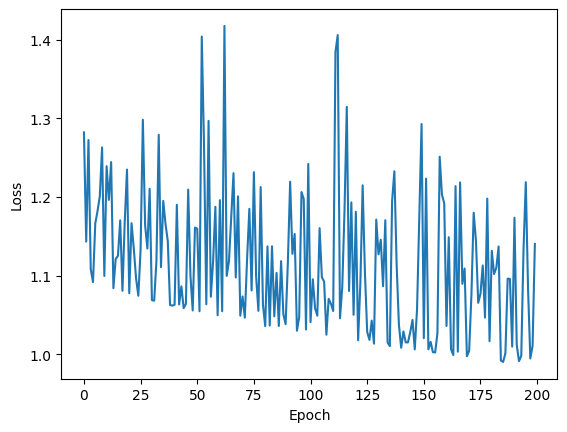

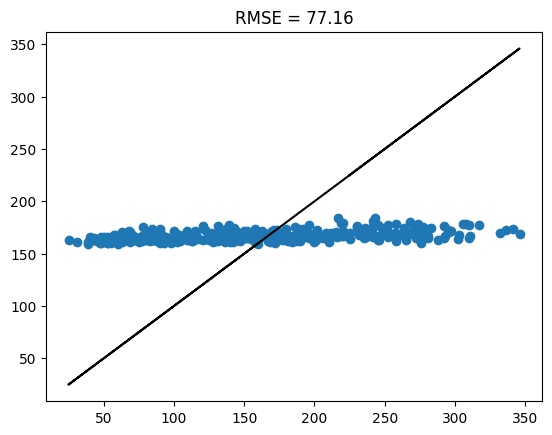

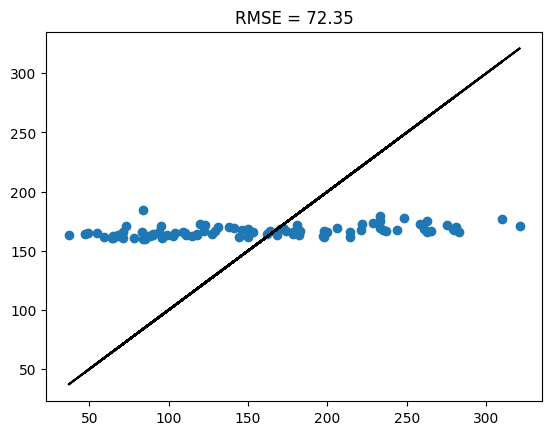

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris, load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_mean = X_train.mean(axis=0)
y_mean = y_train.mean(axis=0)

x_std = X_train.std(axis=0)
y_std = y_train.std(axis=0)

X_train = (X_train - x_mean)/x_std
y_train = (y_train - y_mean)/y_std

X_test = (X_test - x_mean)/x_std
y_test = (y_test - y_mean)/y_std

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.hidden_layer1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden_layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.nn.functional.relu(self.hidden_layer1(x))
        x = torch.nn.functional.relu(self.hidden_layer2(x))
        return self.output_layer(x)

model = MLP(10, 10)

optimizer_name = 'SGD'   # 'SGD' ou 'Adam'
learning_rate = 0.0001    #  0.0001, 0.001 ou 0.01

if optimizer_name == 'SGD':
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
elif optimizer_name == 'Adam':
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


criterion = torch.nn.MSELoss()

num_epochs = 200
loss_logs = []

for epoch in range(num_epochs):

    # Start epoch loss
    running_loss = 0.0

    for b, (X_batch, y_batch) in enumerate(train_dataloader):

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    # Update epoch loss
    loss_logs.append(running_loss/b)

# Plot loss
plt.plot(loss_logs)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

with torch.no_grad():
    outputs = model(X_train)
    y_train_real = y_train * y_std + y_mean
    outputs_real = outputs * y_std + y_mean

plt.scatter(y_train_real, outputs_real)
plt.plot(y_train_real, y_train_real, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs_real, y_train_real).item()):.2f}')
plt.show()

with torch.no_grad():
    outputs = model(X_test)
    y_test_real = y_test * y_std + y_mean
    outputs_real = outputs * y_std + y_mean

plt.scatter(y_test_real, outputs_real)
plt.plot(y_test_real, y_test_real, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs_real, y_test_real).item()):.2f}')
plt.show()

# Considerações Finais

Neste capítulo, apresentamos diferentes algoritmos de otimização que podemos utilizar quando desenvolvemos nossos modelos.

## Próximo Capítulo

Nos próximos capítulos, falaremos mais sobre representações de redes neurais. Mais especificamente, iremos discutir diferentes arquiteturas discriminativas de redes neurais, utilizadas para visão computacional e sequências.

# Referências

- Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). Learning representations by back-propagating errors. nature, 323(6088), 533-536.
- Cauchy, A. (1847). Méthode générale pour la résolution des systemes d'équations simultanées. Comp. Rend. Sci. Paris, 25(1847), 536-538.
- Robbins, H., & Monro, S. (1951). A stochastic approximation method. The annals of mathematical statistics, 400-407.
- Polyak, B. T. (1964). Some methods of speeding up the convergence of iteration methods. Ussr computational mathematics and mathematical physics, 4(5), 1-17.
- Sutskever, I., Martens, J., Dahl, G., & Hinton, G. (2013, May). On the importance of initialization and momentum in deep learning. In International conference on machine learning (pp. 1139-1147). PMLR.
- Hinton, G., Srivastava, N., & Swersky, K. (2012). Neural networks for machine learning lecture 6a overview of mini-batch gradient descent. Cited on, 14(8), 2.
- Kingma, D. P. (2014). Adam: A method for stochastic optimization. arXiv preprint arXiv:1412.6980.